# Spatial Plotting with MultiGATE

This notebook demonstrates spatial clustering analysis and visualization using MultiGATE on human hippocampus data.


## 1. Import Libraries

Import necessary libraries for spatial analysis and visualization.


In [1]:
# Core libraries for single-cell spatial analysis
import scanpy as sc
import matplotlib.pyplot as plt
import sys

In [2]:
# Import MultiGATE package
sys.path.insert(0, '/lustre/project/Stat/s1155202250/fastfolder/code/st/MultiGATE/MultiGATEgithub0607/tutorial_notebooks')
import MultiGATE 

Instructions for updating:
non-resource variables are not supported in the long term


## 2. Load Data

Load results of human hippocampus spatial data.


In [3]:
# Load multimodal spatial data
adata1 = sc.read_h5ad('./human_hippResults/human_adata1.h5ad')
adata2 = sc.read_h5ad('./human_hippResults/human_adata2.h5ad')

## 3. Configure R Environment

Set up R environment for Seurat integration.


In [4]:
# Configure R environment paths for Seurat
import os
os.environ['R_HOME'] = "/lustre/project/Stat/s1155077016/condaenvs/Seurat4/lib/R" 
os.environ['R_USER'] = '/users/s1155077016/anaconda3/lib/python3.9/site-packages/rpy2'


## 4. Clustering Analysis

Perform clustering analysis.


In [5]:
# Perform weighted nearest neighbor analysis with clustering resolution
MultiGATE.wnn_R(adata1, adata2, res=0.8)


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

R[write to console]: Attaching SeuratObject

R[write to console]: Warning:
R[write to console]:  Feature names cannot have underscores ('_'), replacing with dashes ('-')

R[write to console]: Warning:
R[write to console]:  Feature names cannot have underscores ('_'), replacing with dashes ('-')

R[write to console]: Calculating cell-specific modality weights

R[write to console]: Finding 20 nearest neighbors for each modality.



  |                                                  | 0 % ~calculating   |+++++++++++++++++++++++++                         | 50% ~00s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=01s  


R[write to console]: Calculating kernel bandwidths



  |                                                  | 0 % ~calculating   |+++++++++++++++++++++++++                         | 50% ~00s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  


R[write to console]: Finding multimodal neighbors



  |                                                  | 0 % ~calculating   |+++++++++++++++++++++++++                         | 50% ~01s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=03s  
  |                                                  | 0 % ~calculating   |+++++++++++++++++++++++++                         | 50% ~00s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  


R[write to console]: Constructing multimodal KNN graph

R[write to console]: Constructing multimodal SNN graph

R[write to console]: Warning:
R[write to console]:  The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session

R[write to console]: 23:31:04 UMAP embedding parameters a = 0.9922 b = 1.112

R[write to console]: 23:31:04 Commencing smooth kNN distance calibration using 1 thread

R[write to console]: 23:31:05 Initializing from normalized Laplacian + noise

R[write to console]: 23:31:05 Commencing optimization for 500 epochs, with 75598 positive edges

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[writ

(AnnData object with n_obs × n_vars = 2500 × 3000
     obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'wnn'
     var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
     uns: 'Spatial_Net', 'gene_peak_Net', 'hvg', 'log1p', 'wnn_colors'
     obsm: 'MultiGATE', 'MultiGATE_clip_all', 'X_umap', 'spatial',
 AnnData object with n_obs × n_vars = 2500 × 28270
     obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'wnn'
     var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_count

## 5. Visualization

Generate spatial plot showing WNN clustering results.


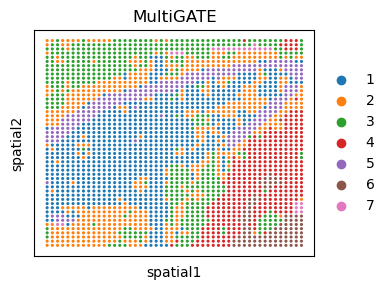

In [6]:
# Configure plot parameters
size = 20
plt.rcParams["figure.figsize"] = (4, 3) 

# Generate spatial plot with WNN clustering
sc.pl.embedding(adata1, basis='spatial', color='wnn', title='MultiGATE', s=size, show=False)

plt.tight_layout()
plt.show()

In [7]:
# Display data summary
adata1

AnnData object with n_obs × n_vars = 2500 × 3000
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'wnn'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'Spatial_Net', 'gene_peak_Net', 'hvg', 'log1p', 'wnn_colors'
    obsm: 'MultiGATE', 'MultiGATE_clip_all', 'X_umap', 'spatial'

## 6. Save Results

Save updated data with clustering results.


In [8]:
# Save processed data with clustering results
adata1.write_h5ad('./human_hippResults/human_adata1.h5ad')
adata2.write_h5ad('./human_hippResults/human_adata2.h5ad')